# Problem Statement

The Boston housing market is highly competitive, and we want to be the best real estate agent in the area. To compete with our peers, we decide to leverage a few basic machine learning concepts to assist us and a client with finding the best selling price for their home.

## Project: Predicting Boston Housing Prices

In this project,I have evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. 

The dataset for this project has been taken from the **[UCI Machine Learning Repository]()**. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('dataset/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


# Data Exploration
In this first section of this project, we will make a **cursory investigation about the Boston housing data and provide the observations**. 

Since the main goal of this project is to **construct a working model which has the capability of predicting the value of houses**, we will need to separate the dataset into features and the target variable. **The features, 'RM', 'LSTAT', and 'PTRATIO',** give us quantitative information about each data point.

The target variable, **'MEDV',** will be the variable we seek to predict. These are stored in features and prices, respectively.

## Calculate Statistics

First we will calculate descriptive statistics about the Boston housing prices. These statistics are extremely important to analyze various prediction results from the constructed model.


In [2]:
#  Minimum price of the data

minimum_price = np.min(prices)
# minimum_price = prices.min()

#  Maximum price of the data
maximum_price = np.max(prices)
# maximum_price = prices.max()

# Mean price of the data
mean_price = np.mean(prices)
# mean_price = prices.mean()

# Median price of the data
median_price = np.median(prices)
# median_price = prices.median()

# Standard deviation of prices of the data
std_price = np.std(prices)
# std_price = prices.std(ddof=0)

# There are other statistics that can be calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# displaying calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
First quartile of prices: $350,700.00
Second quartile of prices: $518,700.00
Interquartile (IQR) of prices: $168,000.00


We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- **'RM'** is the average number of rooms among homes in the neighborhood.
    - For a higher RM, one would expect to observe a higher MEDV.
    - This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

- **'LSTAT'** is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
    - For a higher LSTAT, one would expect to observe a a lower MEDV.
    - The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would lower demand, hence lower prices.

- **'PTRATIO'** is the ratio of students to teachers in primary and secondary schools in the neighborhood.
    - For a higher LSTAT, one would expect to observe a lower MEDV.
    - This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

Personal note: These are merely based on intuition. These statements will be validated in the subsequent parts of this project.

# Visualization

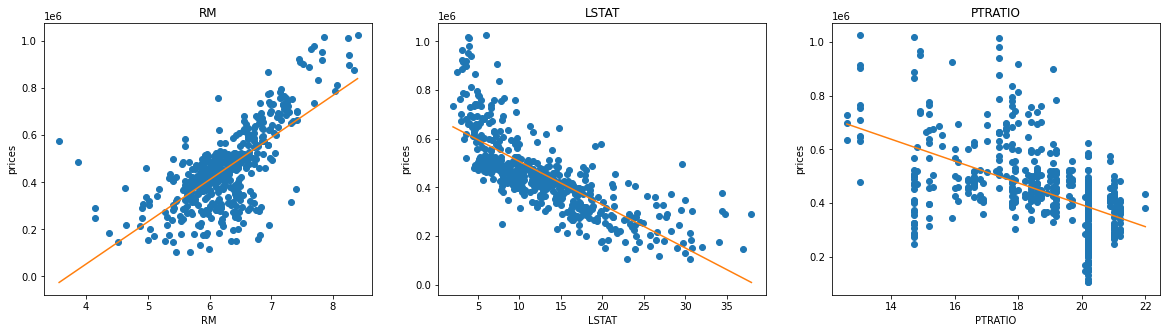

In [3]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

# Developing a Model
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in the predictions.

## Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. 

For this project, we will be calculating the **coefficient of determination, R2, to quantify the model's performance.** The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values **for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable.**
- A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. 
- Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. 
- A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.


In [4]:

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    return score

In [5]:
# Assume that a dataset contains five data points and a model made the following predictions for the target variable
# [3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]
# Calculate the performance of this model

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Since R^2 = 92.3%, this implies that 92.3% of variation is explained by the target variable and it seems to be high.

## Shuffle and Spliting Dataset into training and testing sets.

Next, we take the Boston housing dataset and split the data into 80% training and 20% testing sets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.


In [6]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [7]:
# Check if split is actually correct
# We can see it's roughly 80% train and 20% train
# So we can proceed!
print(features.shape[0])
print(float(X_train.shape[0]) / float(features.shape[0]))
print(float(X_test.shape[0]) / float(features.shape[0]))

489
0.7995910020449898
0.20040899795501022


The benefit to splitting a dataset into some ratio of training and testing subsets is because we need a way to choose between machine learning models. And our goal is to estimate likely performance of a model on out-of-sample data.


- Initial idea: we can train and test on the same data.
    - But, maximizing training accuracy rewards overly complex models that overfit the training data.
    - As you add more features, you can slowly reach a 100% accuracy but you are not able to generalize well.

- Alternative idea: we can use train/test split.
    - We can split the dataset into two pieces so that the model can be trained and tested on different data.
    - Then, testing accuracy is a better estimate than training accuracy of out-of-sample performance.

This is an extension beyond the scope of the train/test split question, highlighting the issue of high variance simply using train/test split without k-fold cross-validation.

- But we've a big problem with train/test split.
    - It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy.
    - Testing accuracy can change a lot depending on a which observation happen to be in the testing set.

Hence we've to use k-fold cross-validation to solve this problem.

# Analyzing Model Performance

In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

## Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.


In [8]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split

In [9]:
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):

        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 scor

C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


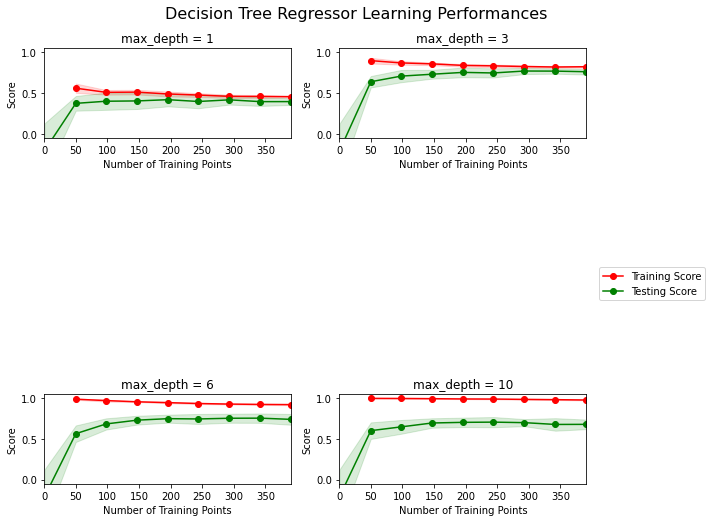

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

- At max_depth = 1 (High Bias Scenario)
     - We can see how the testing score (green line) increases with the number of observations.
        - However, the testing score only increases to approximately 0.4, a low score.
        - This indicates how the model does not generalize well for new, unseen, data.
     - Moreover, the training score (red line) decreases with the number of observations.
        - Also, the training score decreases to a very low score of approximately 0.4.
        - This indicates how the model does not seem to fit the data well.
     - Thus, we can say this model is facing a high bias problem. Consequently, having more training points would not benefit the model as the model is underfitting the dataset. Instead, one should increase the model complexity to better fit the dataset.
         - Morever, the teting score has reached a plateau suggesting the model may not improve from adding more training points.
         
**This is an extension explaining the rest of the depths for completeness. I have summarized everything instead of writing in full sentences.**

- **max_depth = 3 (Ideal Scenario)**
    - Testing score (green line) increases with training points
        - Reaches ~0.8
        - High score
        - Generalize well
    - Training score (red line) decreases slightly with training points
        - Reachers ~0.8
        - High score
        - Fit dataset well
    - There seems to be no high bias or high variance problem
        - Model fits and generalizes well
        - Ideal
        - More training points should help it become an even more ideal model!
- **max_depth = 10 (High Variance Scenario)**
     - Testing score (green line) increases with training points
        - Reaches ~0.7
        - Not so high score
        - Does not generalize well
    - Training score (red line) barely decreases with training points
        - At ~1.0
        - Almost perfect score
        - Overfitting dataset
    - There seems to be a high variance problem
        - Overfitting

- **max_depth = 6 (Slightly High Variance Scenario)**
    - Testing score (green line) increases with training points
        - Reaches ~0.75
        - Not so high score
        - Does not generalize well
    - Training score (red line) decreases slightly with training points
        - At ~0.9
        - High score
        - Overfitting dataset
    - There seems to be a high variance problem
        - Overfitting
        - More training points might help
        - This is getting close to the ideal scenario!

# Complexity Curves

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.


In [11]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


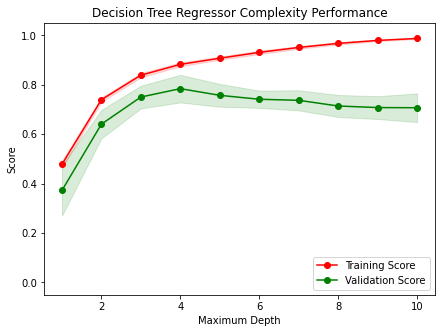

In [12]:
ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

It is easy to identify whether the model is suffering from a high bias or a high variance.

- **High variance models** have a gap between the training and validation scores.
    - This is because it is able to fit the model well but unable to generalize well resulting in a high training score but low validation score.

- **High bias models** have have a small or no gap between the training and validations scores.
    - This is because it is unable to fit the model well and unable to generalize well resulting in both scores converging to a similar low score.
    
**Maximum depth of 1: High Bias**
- Both training and testing scores are low.
- There is barely a gap between the training and testing scores.
- This indicates the model is not fitting the dataset well and not generalizing well hence the model is suffering from high bias.

**Maximum depth of 10: High Variance**
- Training score is high. Testing score is low
- There is a substantial gap between the training and testing scores.
- This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance.


**Maximum depth of 4: Best Optimal Model**
- The training score seems to plateau here, indicating the highest possible score for the model's ability to generalize to unseen data.
- Gap between the training score and testing score does not seem to be substantial too, indicating that the model may not be suffering from a high variance scenario.


# Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.



## Fitting a Model


#### Using GridSearchCV

In [19]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve, GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0],n_splits = 10, test_size = 0.2, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

#### Using RandomizedSearchCV

In [34]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when the dataset grows
    # X.shape[0] is the total number of elements
    # n_splits is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

# Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the **target variable**. Now these predictions can be used to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

To see what maximum depth does the optimal model have and How does this result compare to our guess?

In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [22]:
# Explanation of how we got the 'max_depth' param
# First we fit the model
# Then we use get_params() to get the optimal parameters

reg = fit_model(X_train, y_train)
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [23]:
# We can access our value from reg.get_params(), a dictionary, using dict['key']
reg.get_params()['max_depth']

4

The optimal model has a maximum **depth of 4**, and the max depth is the same.

**Extra findings using RandomizedSearchCV**

In [25]:
# Fit the training data to the model using grid search
reg_2 = fit_model_2(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg_2.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


'max_depth' is 4 for the optimal model. Interestingly, we get the same results!

## Predicting Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

For Example:

    Feature	Client 1	Client 2	Client 3
    Total number of rooms in home	5 rooms	4 rooms	8 rooms
    Neighborhood poverty level (as %)	17%	32%	3%
    Student-teacher ratio of nearby schools	15-to-1	22-to-1	12-to-1


In [27]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


- The prices are rounded up to the nearest hundred as the prices in the dataset are all rounded to the nearest hundred.
- Compared to the data-exploration, it seems that the houses' prices from client 1 and client 2 are below the mean and median prices.
- For client 2, it seems reasonable due to the high poverty level and student-to-teacher ratio.
- For client 1, it also seems reasonable due to the average poverty level and student-to-teacher ratio.
- And the house's price from client 3 is way above the mean and median prices, nearing to the maximum price in the dataset.This seems reasonable given the low poverty level and student-to-teacher ratio with a high number of rooms.

# Visualization

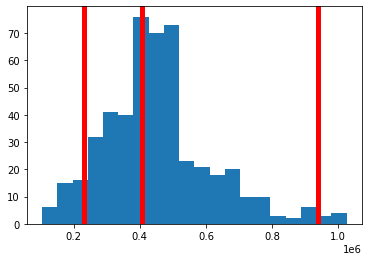

In [28]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 20)
for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')

## Assess Reasonableness of Prediction using NearestNeighbors

To assess if the prediction is reasonable, besides from comparing it with the median, the mean and checking if it is included in one standard deviation range, we could use SKlearn to find the nearest neighbours of the feature vector.
We can then contrast your results with the closest neighbours, the ones that have similar characteristics.

In [31]:
# Import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Set number of neighbors
num_neighbors=5

def nearest_neighbor_price(x):
    # x is your vector and X is the data set.
    def find_nearest_neighbor_indexes(x, X):
        # Instantiate
        neigh = NearestNeighbors(num_neighbors)
        # Fit
        neigh.fit(X)
        distance, indexes = neigh.kneighbors(x)
        return indexes
        # This returns, the position, say for example [4, 55, 22]
        # array([[357, 397, 356, 141, 395]])
    indexes = find_nearest_neighbor_indexes(x, features)
    # Create list
    sum_prices = []
    # Loop through the array
    for i in indexes:
        # Append the prices to the list using the index position i
        sum_prices.append(prices[i])
    # Average prices
    neighbor_avg = np.mean(sum_prices)
    # Return average
    return neighbor_avg

# Test if it's working with a list [4, 55, 22]
arr_test = np.array([4, 55, 22]).reshape(1, -1)
print (nearest_neighbor_price(arr_test))

# client_data = [[5, 17, 15], # Client 1
               #[4, 32, 22], # Client 2
               #[8, 3, 12]]  # Client 3

# Loop through data, this is basically doing the following
# print(nearest_neighbor_price([5, 17, 15]))
# print(nearest_neighbor_price([4, 32, 22]))
# print(nearest_neighbor_price([8, 3, 12]]))
index = 0
for i in client_data:
    arr = np.array(i).reshape(1, -1)
    val=nearest_neighbor_price(arr)
    index += 1
    # num_neighbours is constant at 5
    # index changes from 1 to 2 to 3
    # value changes respectively from $372,540.00 to $162,120.00 to $897,120.00
    print ("The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, val))

280980.0
The predicted 5 nearest neighbors price for home 1 is: $372,540.00
The predicted 5 nearest neighbors price for home 2 is: $162,120.00
The predicted 5 nearest neighbors price for home 3 is: $897,120.00


C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. To run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [32]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)

        # Fit the data
        reg = fitter(X_train, y_train)

        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)

        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [33]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


## Acheivement

In this project, in particular
- we explored the data and observed features.
- trained and test models.
- identified potential problems, such as errors due to bias or variance.
- and applied techniques to improve the model, such as cross-validation and grid search.
